TRIAL 1.01 -> 12th May, 2020

# DATA IMPORTING

In [0]:
## ALL IMPORTS


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import skew, norm
from scipy import stats
%matplotlib inline

In [0]:
# !cd drive/My\ Drive/Colab\ Notebooks
# ls proj_1\ -\ loan\ prediction
# !cd drive/My\ Drive/
!ls

drive  sample_data


In [0]:
train = pd.read_csv('drive/My Drive/Colab Notebooks/proj_1 - loan prediction/train.csv')
test = pd.read_csv('drive/My Drive/Colab Notebooks/proj_1 - loan prediction/test.csv')
sample = pd.read_csv('drive/My Drive/Colab Notebooks/proj_1 - loan prediction/sample_submission.csv')

print("Reading sample file, train and testing data done!")

Reading sample file, train and testing data done!


In [0]:
target = 'Loan_Status'

numeric_feat = list(train.select_dtypes(include = [np.number]).columns)
cat_feat = list(train.select_dtypes(exclude = [np.number]).columns)


print('Target variable, numeric and categorical datatypes seperated. Moving forward with data preprocessing!')

Target variable, numeric and categorical datatypes seperated. Moving forward with data preprocessing!


# DATA PREPROCESSING

### Data Cleaning

In [0]:
## SAVING AND DROPPING THE REDUNDANT LOAD ID COLUMN

trainID = train['Loan_ID']
testID = test['Loan_ID']

train.drop('Loan_ID', axis = 1, inplace = True)
test.drop('Loan_ID', axis = 1, inplace = True)

In [0]:
train[target] = train[target].map({'Y':1,'N':0})

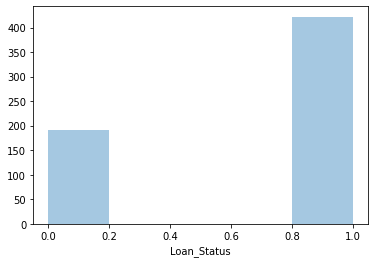

In [0]:
sns.distplot(train[target], kde = False)

In [0]:
## MERGING THE TRAINING AND TESTING DATASET TO PREPROCESS AT ONCE

train_labels = train[target].reset_index(drop = True)
train_features = train.drop(target, axis = 1)
test_features = test

df = pd.concat([train_features, test_features]).reset_index(drop = True)
df.shape

(981, 11)

In [0]:
df.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

Going to process each value individually until no null values are left.

In [0]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [0]:
# df['Credit_History'].unique()
# df['ApplicantIncome'].mean()

In [0]:
## FILLING VALUES I HAVE A BIT IDEA ABOUT

df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

df['Married'].fillna(df['Married'].mode()[0], inplace = True)

df['Dependents'].replace(to_replace = '3+', value = 3, inplace = True)
df['Dependents'].fillna(df['Dependents'].median(), inplace = True)
df['Dependents'] = df['Dependents'].astype(int)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

## FILLING WITH MEAN
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace = True)

# df = df.dropna().reset_index(drop = True)

In [0]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

No more null values left.

No more missing values in the dataframe. 

### Data Transformation

In [0]:
## CHECKING THE  SKEWNESS AND KURTOSIS OF THE NUMERICAL DATA

temp = list(df.select_dtypes(include = np.number))
skew_check = temp[1:5]

skew_vals = {col : df[col].skew() for col in skew_check}
kurt_vals = {col : df[col].kurt() for col in skew_check}
print(skew_vals, "\n", kurt_vals)

{'ApplicantIncome': 7.086961153594506, 'CoapplicantIncome': 6.844108581480271, 'LoanAmount': 2.752054617168129, 'Loan_Amount_Term': -2.502958777682449} 
 {'ApplicantIncome': 71.40205531120817, 'CoapplicantIncome': 77.35741642014432, 'LoanAmount': 11.954982015522486, 'Loan_Amount_Term': 7.5824094650214855}


In [0]:
df[skew_check].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,981.00000,981.000000
mean,5179.795107,1601.916330,142.51153,342.201873
std,5695.104533,2718.772806,76.34777,64.432886
min,0.000000,0.000000,9.00000,6.000000
25%,2875.000000,0.000000,101.00000,360.000000
50%,3800.000000,1110.000000,128.00000,360.000000
75%,5516.000000,2365.000000,160.00000,360.000000
max,81000.000000,41667.000000,700.00000,480.000000


In [0]:
## TRANSFORMING FEATURES TO BETTER FIT NORMAL DISTRIBUTION APPLYING LOG(1+X) TO ALL

for col in skew_check:
  df[col] = np.log(1+df[col])

In [0]:
skew_vals = {col : df[col].skew() for col in skew_check}
kurt_vals = {col : df[col].kurt() for col in skew_check}
print(skew_vals, "\n", kurt_vals)

{'ApplicantIncome': -2.761387414532987, 'CoapplicantIncome': -0.2002214927323615, 'LoanAmount': -0.1766843505351951, 'Loan_Amount_Term': -5.588829242638548} 
 {'ApplicantIncome': 37.629737525256644, 'CoapplicantIncome': -1.89567333574436, 'LoanAmount': 2.5747225508476745, 'Loan_Amount_Term': 43.42492995118047}


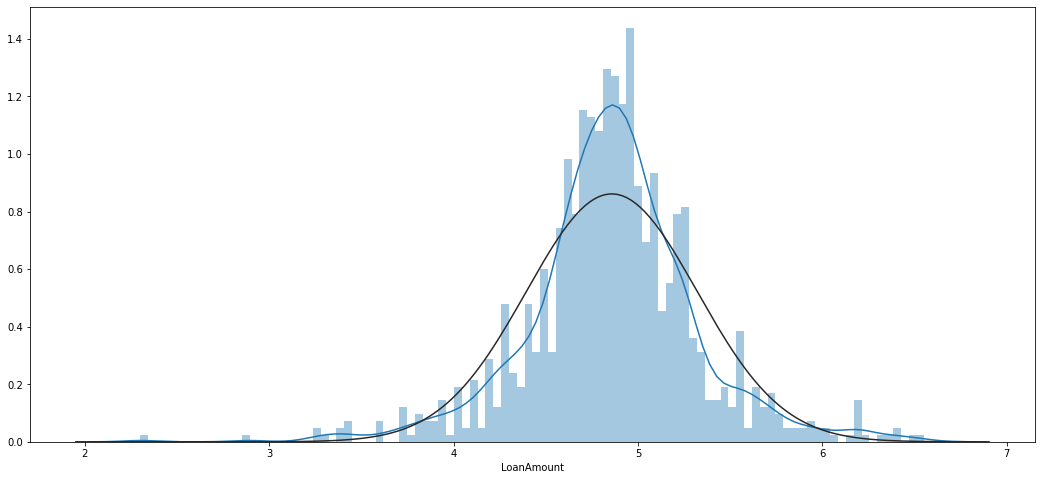

In [0]:
f, g = plt.subplots(figsize = (18,8))
sns.distplot(df[skew_check[2]], bins = 100, fit = norm)
plt.show()

Variables fit Normal Distribution better now.

In [0]:
## ENCODING CATEGORICAL VARIABLES TO NUMERICAL VALUES AS MODELS CAN ONLY HANDLE NUMERICAL VALUES

df1 = pd.get_dummies(df, columns=list(df.select_dtypes(exclude=np.number)))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,8.674197,0.000000,4.966415,5.888878,1.0,Urban
1,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,1.0,Rural
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,1.0,Urban
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,1.0,Urban
4,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,1.0,Urban


In [0]:
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,8.674197,0.000000,4.966415,5.888878,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1,8.430327,7.319202,4.859812,5.888878,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0,8.006701,0.000000,4.204693,5.888878,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0,7.857094,7.765993,4.795791,5.888878,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0,8.699681,0.000000,4.955827,5.888878,1.0,0,1,1,0,1,0,1,0,0,0,1


### Recreating training and test set

In [0]:
X = df1.iloc[:len(train_labels),:]
y = train_labels
X_test = df1.iloc[len(train_labels):,:]

# FITTING MODELS

In [0]:
## IMPORTING NECERSSARY MODELS FROM SKLEARN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


### KNN Classifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X,y)

scores_knn = cross_val_score(knn_model, X, y, cv = 5)

### Logistic Regression Classifier

In [0]:
log_regr = LogisticRegression(max_iter = 500, random_state=0)
log_regr_model = log_regr.fit(X, y)

scores_log_regr = cross_val_score(log_regr_model, X, y, cv = 5)

### SVM Classifier

In [0]:
svm_algo = svm.SVC(C = 1.0, kernel='rbf')
svm_algo_model = svm_algo.fit(X,y)

scores_svm = cross_val_score(svm_algo_model, X, y, cv = 5)

### Decision Tree Classifier

In [0]:
dtree = tree.DecisionTreeClassifier(max_depth=1)
dtree_model = dtree.fit(X,y)

scores_dtree = cross_val_score(dtree_model, X, y, cv=5)

### Random Forest Classifier

In [0]:
rforest = RandomForestClassifier(max_depth=3)
rforest_model = rforest.fit(X,y)

scores_rforest = cross_val_score(rforest_model, X, y, cv=5)

In [0]:
xgb = XGBClassifier(max_depth=1, n_estimators=200, learning_rate=0.008)
xgb_model = xgb.fit(X,y)

scores_xgb = cross_val_score(xgb_model, X, y, cv=5)

scores_xgb.mean()

0.809462881514061

### Blended Classifier

In [0]:

# def blendedclassifier_model(X):
#   return (
#       (0.33*log_regr.predict(X))+\
#       (0.33*dtree.predict(X))+\
#       (0.34*rforest.predict(X))
#           )
  


In [0]:
blendedclassifier = VotingClassifier(estimators=[('lr', log_regr_model), ('dt', dtree_model), ('rf', rforest_model)], voting = 'hard')
blendedclassifier_model = blendedclassifier.fit(X,y)

scores_blendedclassifier = cross_val_score(blendedclassifier_model, X, y, cv=5)

# Accuracy of all the models

In [0]:
print('All CV scores:-\n\tKNN score: {:.4f},\
      \n\tSVM score: {:.4f},\
      \n\tLogistic Regression score: {:.4f},\
      \n\tDecision Tree score: {:.4f},\
      \n\tRandom Forest score: {:.4f}\
      \n\tBlended Model score: {:.4f}'
      .format(scores_knn.mean()*100, 
              scores_svm.mean()*100, 
              scores_log_regr.mean()*100, 
              scores_dtree.mean()*100, 
              scores_rforest.mean()*100, 
              scores_blendedclassifier.mean()*100
              )
      )


All CV scores:-
	KNN score: 0.6971,      
	SVM score: 0.6873,      
	Logistic Regression score: 0.8046,      
	Decision Tree score: 0.8095,      
	Random Forest score: 0.8078      
	Blended Model score: 0.8078


# Submitting file

In [0]:
log_regr.predict(X_test).shape

(367,)

In [0]:
sample.iloc[:,1] = pd.Series(blendedclassifier_model.predict(X_test)).map({1:'Y', 0:'N'})

In [0]:
sample.isnull().sum()

Loan_ID        0
Loan_Status    0
dtype: int64

In [0]:
sample.to_csv('02_loan_pred_submission_1-02.csv', index = False)

In [0]:
ls

 01_kaggle_adv_housing.gsheet       02_loan_pred_submission_1-02.csv
 02_loan_pred.ipynb                'proj_1 - loan prediction'/
 02_loan_pred_submission_1-01.csv
